# Section-B database creation

# Which time of day (morning, noon, night) has the highest number of positive tweets? 

In [4]:
import pandas as pd

# Assuming the dataset is loaded as a DataFrame 'df'
df = pd.read_excel('Data Processing for AI - Data set.xlsm', sheet_name='test')

# Filter for positive tweets
positive_tweets = df[df['sentiment'] == 'positive']

# Count positive tweets by time of day
time_counts = positive_tweets['Time of Tweet'].value_counts()

# Find the time with the highest count
max_time = time_counts.idxmax()
max_count = time_counts.max()

print(f"The time of day with the highest number of positive tweets is '{max_time}' with {max_count} tweets.")

The time of day with the highest number of positive tweets is 'night' with 374 tweets.


# Which country has the highest number of negative tweets?

In [5]:
import pandas as pd

# Load dataset
df = pd.read_excel('Data Processing for AI - Data set.xlsm', sheet_name='test')

# Filter for negative tweets
negative_tweets = df[df['sentiment'] == 'negative']

# Count negative tweets by country
country_counts = negative_tweets['Country'].value_counts()

# Find the country with the highest count
max_country = country_counts.idxmax()
max_count = country_counts.max()

print(f"The country with the highest number of negative tweets is '{max_country}' with {max_count} tweets.")

The country with the highest number of negative tweets is 'Bhutan' with 13 tweets.


# Do older users (60+ years age) tend to post more neutral tweets than younger users? 

In [6]:
import pandas as pd

# Load dataset
df = pd.read_excel('Data Processing for AI - Data set.xlsm', sheet_name='test')

# Define age groups
df['Age Group'] = df['Age of User'].apply(lambda x: '60+' if x in ['60-70', '70-100'] else 'Younger')

# Calculate proportion of neutral tweets by age group
neutral_proportions = df[df['sentiment'] == 'neutral'].groupby('Age Group').size() / df.groupby('Age Group').size()

# Extract proportions
older_neutral = neutral_proportions.get('60+', 0)
younger_neutral = neutral_proportions.get('Younger', 0)

print(f"Proportion of neutral tweets for 60+ users: {older_neutral:.3f}")
print(f"Proportion of neutral tweets for younger users: {younger_neutral:.3f}")
print("Older users" if older_neutral > younger_neutral else "Younger users", "tend to post more neutral tweets.")

Proportion of neutral tweets for 60+ users: 0.412
Proportion of neutral tweets for younger users: 0.401
Older users tend to post more neutral tweets.


# Is there a correlation between population density and tweet sentiment? 

In [7]:
import pandas as pd

# Load dataset
df = pd.read_excel('Data Processing for AI - Data set.xlsm', sheet_name='test')

# Encode sentiment
sentiment_map = {'negative': -1, 'neutral': 0, 'positive': 1}
df['sentiment_encoded'] = df['sentiment'].map(sentiment_map)

# Compute correlation
correlation = df['sentiment_encoded'].corr(df['Density (P/Km²)'])

print(f"Correlation between population density and tweet sentiment: {correlation:.3f}")

Correlation between population density and tweet sentiment: 0.003


# Text Cleaning Steps: Conduct essential text cleaning on the tweet text before analysis. Explain why these steps are important

# Text Cleaning Steps: Conduct essential text cleaning on the tweet text before analysis. Explain why these steps are important

In [8]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\seenu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\seenu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\seenu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
# Load dataset
df = pd.read_excel('Data Processing for AI - Data set.xlsm', sheet_name='test')

In [12]:
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346,652860,60
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797,27400,105
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044,2381740,18
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265,470,164
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272,1246700,26


In [14]:
df.shape

(3534, 9)

In [15]:
df.describe(include ="all")

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
count,3534,3534,3534,3534,3534,3534,3.534000e+03,3.534000e+03,3534.000000
unique,3534,3534,3,3,6,195,NaN,NaN,NaN
top,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,NaN,NaN,NaN
freq,1,1,1430,1178,590,20,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,3.941891e+07,6.722499e+05,348.894171
std,NaN,NaN,NaN,NaN,NaN,NaN,1.468757e+08,1.839134e+06,1967.012367
min,NaN,NaN,NaN,NaN,NaN,NaN,8.010000e+02,0.000000e+00,2.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.968001e+06,2.281000e+04,35.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,8.696453e+06,1.127600e+05,87.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2.843594e+07,5.279700e+05,214.000000


In [16]:
# Define text cleaning function
def clean_text(text):
    # Step 1: Convert to lowercase
    text = text.lower()
    
    # Step 2: Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Step 3: Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    
    # Step 4: Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Step 5: Tokenize
    tokens = word_tokenize(text)
    
    # Step 6: Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Step 7: Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into a single string
    return ' '.join(tokens)


In [17]:
# Apply cleaning to the 'text' column
df['cleaned_text'] = df['text'].apply(clean_text)

In [18]:

# Display the first few rows to verify
print(df[['text', 'cleaned_text']].head())

# Save the cleaned dataset (optional)
df.to_excel('cleaned_data.xlsm', index=False)

                                                text  \
0  Last session of the day  http://twitpic.com/67ezh   
1   Shanghai is also really exciting (precisely -...   
2  Recession hit Veronique Branquinho, she has to...   
3                                        happy bday!   
4             http://twitpic.com/4w75p - I like it!!   

                                        cleaned_text  
0                                   last session day  
1  shanghai also really exciting precisely skyscr...  
2  recession hit veronique branquinho quit compan...  
3                                         happy bday  
4                                               like  


In [19]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\seenu/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Data Preprocessing: Explain the additional data preprocessing and cleaning you have done for each variable and why? 

In [20]:
df = pd.read_excel('cleaned_data.xlsm')

In [21]:
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),cleaned_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346,652860,60,last session day
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797,27400,105,shanghai also really exciting precisely skyscr...
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044,2381740,18,recession hit veronique branquinho quit compan...
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265,470,164,happy bday
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272,1246700,26,like


In [22]:
# sentiment: Verify values and ensure categorical
valid_sentiments = ['positive', 'negative', 'neutral']
df = df[df['sentiment'].isin(valid_sentiments)]

In [23]:
# Time of Tweet: Verify categorical values
valid_times = ['morning', 'noon', 'night']
df = df[df['Time of Tweet'].isin(valid_times)]

In [24]:
# Age of User: Group into '60+' and 'Younger' for analysis, verify categories
valid_ages = ['0-20', '21-30', '31-45', '46-60', '60-70', '70-100']
df = df[df['Age of User'].isin(valid_ages)]
df['Age Group'] = df['Age of User'].apply(lambda x: '60+' if x in ['60-70', '70-100'] else 'Younger')

In [25]:
# Country: Check for consistency (no normalization needed as names are consistent)
# No specific cleaning, but ensure no missing values
df = df[df['Country'].notna()]

In [26]:
# Population -2020: Convert to numeric, check for invalid values
df['Population -2020'] = pd.to_numeric(df['Population -2020'], errors='coerce')
df = df[df['Population -2020'].notna()]

In [27]:
# Land Area (Km²): Convert to numeric, handle scientific notation
df['Land Area (Km²)'] = pd.to_numeric(df['Land Area (Km²)'], errors='coerce')
df = df[df['Land Area (Km²)'].notna()]

In [28]:
# Density (P/Km²): Verify as numeric, check consistency
df['Density (P/Km²)'] = pd.to_numeric(df['Density (P/Km²)'], errors='coerce')
df = df[df['Density (P/Km²)'].notna()]

In [29]:
# Remove duplicates
df = df.drop_duplicates()

In [30]:
# Check for missing values (already handled above, but confirm)
missing_values = df.isna().sum()
print("Missing values after cleaning:\n", missing_values)

Missing values after cleaning:
 textID               0
text                 0
sentiment            0
Time of Tweet        0
Age of User          0
Country              0
Population -2020     0
Land Area (Km²)      0
Density (P/Km²)      0
cleaned_text        12
Age Group            0
dtype: int64


In [31]:
# 4. Optional: Encode sentiment for modeling (e.g., negative=0, neutral=1, positive=2)
sentiment_map = {'negative': 0, 'neutral': 1, 'positive': 2}
df['sentiment_encoded'] = df['sentiment'].map(sentiment_map)

In [32]:
# Display the first few rows to verify
print("\nFirst few rows of preprocessed dataset:\n", df.head())


First few rows of preprocessed dataset:
        textID                                               text sentiment  \
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral   
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive   
2  eee518ae67  Recession hit Veronique Branquinho, she has to...  negative   
3  01082688c6                                        happy bday!  positive   
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive   

  Time of Tweet Age of User      Country  Population -2020  Land Area (Km²)  \
0       morning        0-20  Afghanistan          38928346           652860   
1          noon       21-30      Albania           2877797            27400   
2         night       31-45      Algeria          43851044          2381740   
3       morning       46-60      Andorra             77265              470   
4          noon       60-70       Angola          32866272          1246700   

   Density (P/

In [33]:
# Save the cleaned dataset
df.to_excel('preprocessed_data.xlsm', index=False)

# Model Training: 

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
# Load dataset
df = pd.read_excel('preprocessed_data.xlsm')

In [36]:
# Ensure no NaN in cleaned_text
df = df[df['cleaned_text'].notna()]

In [37]:
# Vectorize text
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['sentiment']

In [38]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [40]:
# Predict and evaluate
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.596

Classification Report:
              precision    recall  f1-score   support

    negative       0.70      0.36      0.48       191
     neutral       0.51      0.81      0.63       278
    positive       0.75      0.54      0.63       236

    accuracy                           0.60       705
   macro avg       0.65      0.57      0.58       705
weighted avg       0.64      0.60      0.59       705



In [41]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['negative', 'neutral', 'positive'])

In [43]:
# Print classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.596

Classification Report:
              precision    recall  f1-score   support

    negative       0.70      0.36      0.48       191
     neutral       0.51      0.81      0.63       278
    positive       0.75      0.54      0.63       236

    accuracy                           0.60       705
   macro avg       0.65      0.57      0.58       705
weighted avg       0.64      0.60      0.59       705



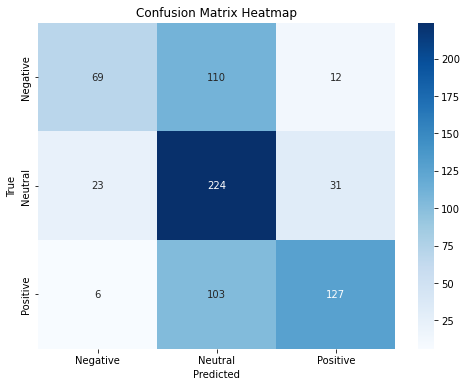

In [44]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [45]:
import pickle

In [46]:
file_name = "model.pkl"
with open(file_name,'wb') as file:
    pickle.dump(nb_model,file)